# Submission Guidelines:
### Since the HW grading is done in a semi-automatic manner, please adhere to the following naming format for your submission. Each group of students (mostly pairs, with some approved exceptions) should submit a Jupyter notebook (.ipynb file and not a .zip file) whose name is the underscored-separated id list of all the submitters. For example, for two submitters, the naming format is: id1_id2.ipynb.

# Data Understanding and Data Preparation Exercise
### Courtesy of Intel Advanced Analytics



In this exercise you will explore data that is related with direct marketing campaigns of a Portuguese banking institution. 
The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, 
in order to access if the product (bank term deposit) would be (or not) subscribed. 

Data source:
 [Moro et al., 2011] S. Moro, R. Laureano and P. Cortez. Using Data Mining for Bank Direct Marketing: An Application of the CRISP-DM Methodology. 
 
Good luck!

# Q1


## Familiarizing yourself with the data

1) Download the 'bank-full_2016.csv' database to a local directory, and load it into a DataFrame object: http://slavanov.com/teaching/ds1617b/bank-full_2016.csv

In [ ]:
import sys
import pandas as pd
import numpy as np
from IPython.display import display

df = pd.read_csv("bank-full_2016.csv")

2) Explore your data a bit:
- What are the dimensions of the table?
- What are the different attributes in it?
- Return a frequency table of the "outcome" category in the table - i.e return all the possible values in that category, and how many times each value is present in the table.
- Display the first 5 rows of the table.

In [ ]:
# shape method := used to retrieve the dimensions of a DataFrame
print("Dimensions:", df.shape, "\n")

# columns method := used to retrieve the column labels of a DataFrame, and this is exactly the attributes
print("Attributes:",df.columns.to_numpy(),"\n")

# frequency table of the "outcome" category in the table
print("Frequency table of the outcome category: \n")
data = {'outcome': df['outcome'].unique(), 'count': [df[df.outcome == "no"].shape[0],df[df.outcome == "yes"].shape[0]]}  
    # Create DataFrame  
df_outcome = pd.DataFrame(data)  
display(df_outcome)

print("")

#Display the first 5 rows of the table
print("The first 5 rows:\n")
display(df.head(5))


Dimensions: (45211, 17) 

Attributes: ['age' 'job' 'marital' 'education' 'default_credit' 'balance'
 'housing_loan' 'personal_loan' 'contact' 'day' 'month' 'duration'
 'campaign' 'days_from_last_contact' 'previous_campaign_contacts'
 'previous_campaign_outcome' 'outcome'] 

Frequency table of the outcome category: 



,outcome,count
0,no,39922
1,yes,5289



The first 5 rows:



,age,job,marital,education,default_credit,balance,housing_loan,personal_loan,contact,day,month,duration,campaign,days_from_last_contact,previous_campaign_contacts,previous_campaign_outcome,outcome
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,NaN,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,NaN,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,NaN,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,NaN,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,NaN,0,unknown,no


3) What is the data type of each attribute in the table?

In [ ]:
print(df.dtypes)

age                             int64
job                            object
marital                        object
education                      object
default_credit                 object
balance                         int64
housing_loan                   object
personal_loan                  object
contact                        object
day                             int64
month                          object
duration                        int64
campaign                        int64
days_from_last_contact        float64
previous_campaign_contacts      int64
previous_campaign_outcome      object
outcome                        object
dtype: object


## Manipulating DataFrames

1) Add to the table a Boolean attribute called 'isContactKnown'. It should say for each element if the 'contact' category is 'unknown' or is it 'cellular'/'telephone'

In [ ]:

df["isContactKnown"] = (df["contact"] != "unknown")
display(df[['contact' , 'isContactKnown']])

,contact,isContactKnown
0,unknown,False
1,unknown,False
2,unknown,False
3,unknown,False
4,unknown,False
...,...,...
45206,cellular,True
45207,cellular,True
45208,cellular,True
45209,telephone,True


2) Change the type of the 'campaign' attribute to Categorical data.

In [ ]:
df["campaign"] = df["campaign"].astype("category")


## Data Distribution

1) What is the range of values for each attribute in the table? what are the mean, std, median values for each category? Hint: You can do all this with one command!

In [ ]:

display(df.describe(include='all'))


,age,job,marital,education,default_credit,balance,housing_loan,personal_loan,contact,day,month,duration,campaign,days_from_last_contact,previous_campaign_contacts,previous_campaign_outcome,outcome,isContactKnown
count,45211.000000,45211,45211,45211,45211,45211.000000,45211,45211,45211,45211.000000,45211,45211.000000,45211.0,8257.000000,45211.000000,45211,45211,45211
unique,NaN,12,3,4,2,NaN,2,2,3,NaN,12,NaN,48.0,NaN,NaN,4,2,2
top,NaN,blue-collar,married,secondary,no,NaN,yes,no,cellular,NaN,may,NaN,1.0,NaN,NaN,unknown,no,True
freq,NaN,9732,27214,23202,44396,NaN,25130,37967,29285,NaN,13766,NaN,17544.0,NaN,NaN,36959,39922,32191
mean,40.936210,NaN,NaN,NaN,NaN,1362.272058,NaN,NaN,NaN,15.806419,NaN,258.163080,NaN,224.577692,0.580323,NaN,NaN,NaN
std,10.618762,NaN,NaN,NaN,NaN,3044.765829,NaN,NaN,NaN,8.322476,NaN,257.527812,NaN,115.344035,2.303441,NaN,NaN,NaN
min,18.000000,NaN,NaN,NaN,NaN,-8019.000000,NaN,NaN,NaN,1.000000,NaN,0.000000,NaN,1.000000,0.000000,NaN,NaN,NaN
25%,33.000000,NaN,NaN,NaN,NaN,72.000000,NaN,NaN,NaN,8.000000,NaN,103.000000,NaN,133.000000,0.000000,NaN,NaN,NaN
50%,39.000000,NaN,NaN,NaN,NaN,448.000000,NaN,NaN,NaN,16.000000,NaN,180.000000,NaN,194.000000,0.000000,NaN,NaN,NaN
75%,48.000000,NaN,NaN,NaN,NaN,1428.000000,NaN,NaN,NaN,21.000000,NaN,319.000000,NaN,327.000000,0.000000,NaN,NaN,NaN


2) Plot a histogram of the 'balance' attribute and a boxplot of the 'age' attribute.

Histogram of the 'balance' attribute: 



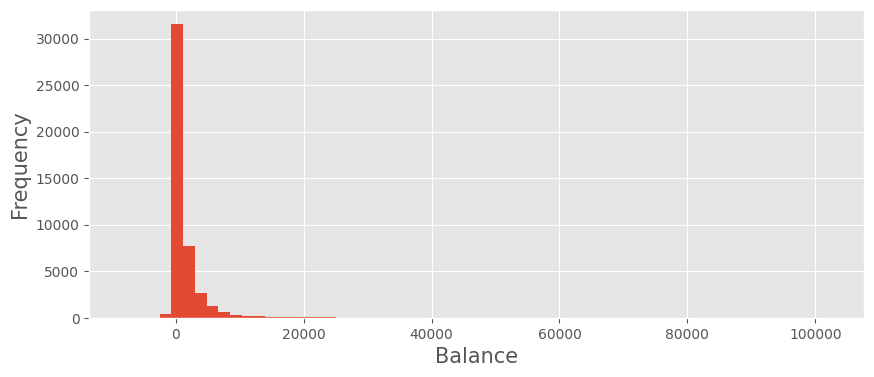

Boxplot of the 'age' attribute: 



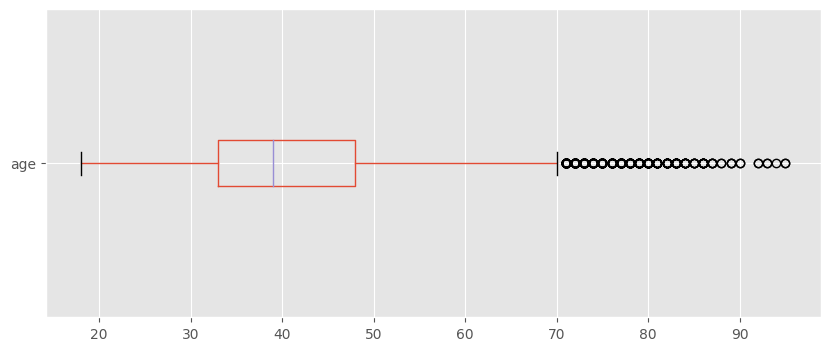

In [ ]:
import matplotlib.pyplot as plt

print("Histogram of the 'balance' attribute: \n")
histogram = df["balance"].plot.hist(bins=60)
histogram.set_xlabel("Balance")
histogram.set_ylabel("Frequency")
plt.show()

print("Boxplot of the 'age' attribute: \n")
df.boxplot(vert=False, column=["age"])
plt.show()


3) Plot separately the distributions of balance values for people with negative outcome and positive outcomes. Are they different? If so, how?

Distribution of balance values for people with negative outcome: 



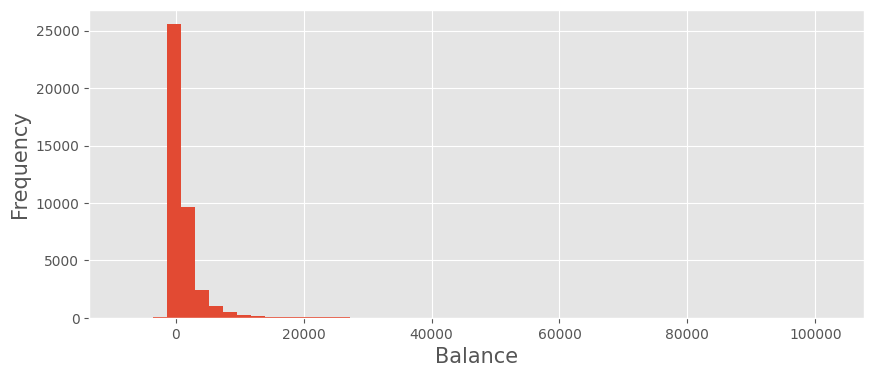


Distribution of balance values for people with positive outcome: 



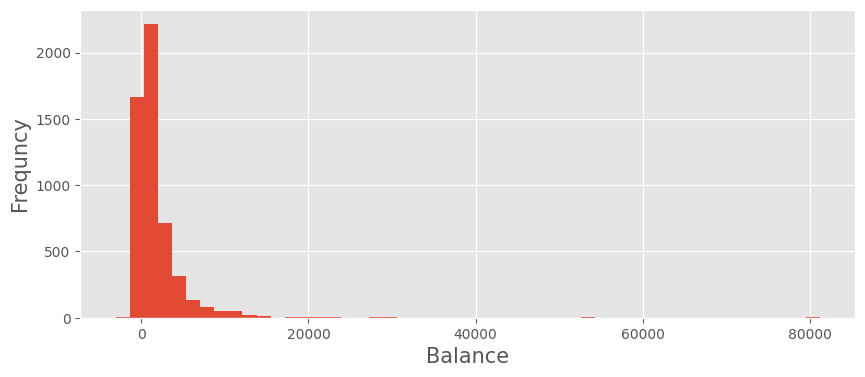

In [ ]:
# Negative outcome
print("Distribution of balance values for people with negative outcome: \n")
new_df_negative = df[(df["outcome"] == "no")]["balance"].plot.hist(bins=50)
new_df_negative.set_xlabel("Balance")
new_df_negative.set_ylabel("Frequency")
plt.show()

print("")

# Positive outcome
print("Distribution of balance values for people with positive outcome: \n")
new_df_positive = df[(df["outcome"] == "yes")]["balance"].plot.hist(bins=50)
new_df_positive.set_xlabel("Balance")
new_df_positive.set_ylabel("Frequncy")
plt.show()

# Are they different? 
## Yes
# If so, how?
## The values of the distribution of balance values for people with positive outcome are much bigger then for people with negative outcome.
## People with a negative outcome tend to have lower balance.


# Q2

## Missing Values

1) Which of the attributes have missing values? How many?

In [ ]:
print("According to df.info(), the column 'days_from_last_contact' has 36954 missing values. \n")
df.info()

print("")

print("If we consider unknown values as missing values, then:")
for col in df.select_dtypes(include=[object]).axes[1]:
   if ((df[col] == "unknown").sum() > 0):
        print("The column",col, "has",(df[col] == "unknown").sum(), "unknown values")




According to df.info(), the column 'days_from_last_contact' has 36954 missing values. 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   age                         45211 non-null  int64  
 1   job                         45211 non-null  object 
 2   marital                     45211 non-null  object 
 3   education                   45211 non-null  object 
 4   default_credit              45211 non-null  object 
 5   balance                     45211 non-null  int64  
 6   housing_loan                45211 non-null  object 
 7   personal_loan               45211 non-null  object 
 8   contact                     45211 non-null  object 
 9   day                         45211 non-null  int64  
 10  month                       45211 non-null  object 
 11  duration                    45211 non-null  int64  
 12  

2) Create another dataframe, which doesn't include any people with 'contact' which is 'cellular' or 'telephone'

In [ ]:
new_df = df[ (df['contact'] != 'cellular') & (df['contact'] != 'telephone') ]
display(new_df)

,age,job,marital,education,default_credit,balance,housing_loan,personal_loan,contact,day,month,duration,campaign,days_from_last_contact,previous_campaign_contacts,previous_campaign_outcome,outcome,isContactKnown
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,NaN,0,unknown,no,False
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,NaN,0,unknown,no,False
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,NaN,0,unknown,no,False
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,NaN,0,unknown,no,False
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,NaN,0,unknown,no,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45061,30,self-employed,single,secondary,no,1031,no,no,unknown,20,oct,7,1,NaN,0,unknown,no,False
45062,58,retired,married,primary,no,742,no,no,unknown,20,oct,5,1,NaN,0,unknown,no,False
45122,40,entrepreneur,single,tertiary,no,262,yes,yes,unknown,26,oct,17,1,NaN,0,unknown,no,False
45135,53,blue-collar,married,primary,no,1294,no,no,unknown,28,oct,71,1,NaN,0,unknown,no,False


3) Look at the missing values in the 'days_from_last_contact' attribute. What do you think these missing values might represent? Can you find support in the table for your assumption? Hint: The attribute names have a meaning.

In [ ]:
print("We think that missing values in the 'days_from_last_contact' attribute might represent that") 
print("these people are new in the DB (For example, if they are old enough now), and therefore no one has contacted them yet.")
print("To see if we are correct, we will check if for those people, 'previous_campaign_outcome' is unknown and if 'previous_campaign_contacts' = 0")
print("We expect the count to be 0 (no people with known previous campaign outcome and no known previous contacts)")
print("If so, it will support our assumption because it's obvious that new people weren't contacted in the last campaign. \n")

cnt1 = (df[(df["days_from_last_contact"].isnull()) & (df["previous_campaign_contacts"] > 0)]).shape[0]
cnt2 = (df[(df["days_from_last_contact"].isnull()) & (df["previous_campaign_outcome"] != "unknown")]).shape[0]
        
print ("The count is : " + str(cnt1 + cnt2))

print("As we expected.")


We think that missing values in the 'days_from_last_contact' attribute might represent that
these people are new in the DB (For example, if they are old enough now), and therefore no one has contacted them yet.
To see if we are correct, we will check if for those people, 'previous_campaign_outcome' is unknown and if 'previous_campaign_contacts' = 0
We expect the count to be 0 (no people with known previous campaign outcome and no known previous contacts)
If so, it will support our assumption because it's obvious that new people weren't contacted in the last campaign. 

The count is : 0
As we expected.


## Discretization

In class, you've seen three methods of data discretization, and we will focus on two of them - Equal-width (distance) and Equal-depth (frequency).

1) Discretize the balance attribute to 7 intervals using equal-width discretization, and plot the frequency table for them.

<Axes: >

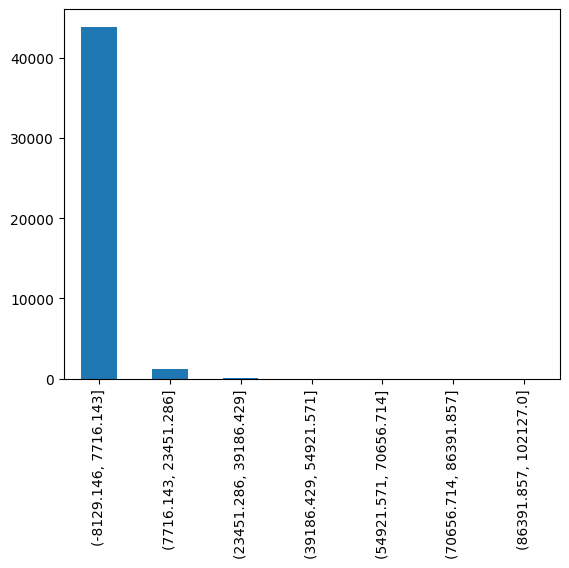

In [ ]:

df["balance"] = pd.cut(df["balance"], bins=7)
frequency_table = df["balance"].value_counts()
frequency_table.plot.bar()


2) Discretize the age attribute into 6 intervals using equal-depth discretization, and plot the frequency table for them.

<Axes: >

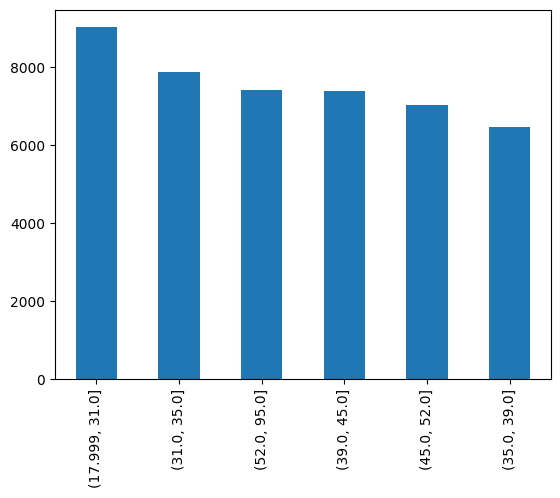

In [ ]:
df["age"] = pd.qcut(df["age"], q=6)
frequency_table = df["age"].value_counts()
frequency_table.plot.bar()

3) Propose a way to further discretize the Month column.

In [ ]:
print("To discretize the 'Month' column that is represented by a string value,")
print("we can create categories based on seasons or quarters. \n")

print("For example, we can use this code: \n")
print('seasons = {"jan": "Winter", "feb": "Winter", "mar": "Spring", "apr": "Spring", "may": "Spring", \n "jun": "Summer", "jul": "Summer", "aug": "Summer", "sep": "Fall", "oct": "Fall", "nov": "Fall", "dec": "Winter"} \n')

print('df["season"] = df["Month"].map(seasons)')





To discretize the 'Month' column that is represented by a string value,
we can create categories based on seasons or quarters. 

For example, we can use this code: 

seasons = {"jan": "Winter", "feb": "Winter", "mar": "Spring", "apr": "Spring", "may": "Spring", 
 "jun": "Summer", "jul": "Summer", "aug": "Summer", "sep": "Fall", "oct": "Fall", "nov": "Fall", "dec": "Winter"} 

df["season"] = df["Month"].map(seasons)


# Q3

## Correlation



```
# This is formatted as code
```

1) Calculate the pearson and spearman correlation between age and balance.

In [ ]:
# Pearson correlation between age and balance
print("Pearson correlation between age and balance is: 0.097783 \n")
display(df[["age", "balance"]].corr(method='pearson', numeric_only=True))

print("")

# Spearman correlation between age and balance
print("Spearman correlation between age and balance is: 0.09638 \n")
display(df[["age", "balance"]].corr(method='spearman', numeric_only=True))


Pearson correlation between age and balance is: 0.097783 



,age,balance
age,1.000000,0.097783
balance,0.097783,1.000000



Spearman correlation between age and balance is: 0.09638 



,age,balance
age,1.00000,0.09638
balance,0.09638,1.00000


2) Calculate the full pearson correlation matrix for all the numeric columns in the data.

In [ ]:
display(df.corr(method ='pearson'))

<ipython-input-27-34c8765a84e4>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  display(df.corr(method ='pearson'))


,age,balance,day,duration,campaign,days_from_last_contact,previous_campaign_contacts
age,1.000000,0.097783,-0.009120,-0.004648,0.004760,-0.107863,0.001288
balance,0.097783,1.000000,0.004503,0.021560,-0.014578,-0.108122,0.016674
day,-0.009120,0.004503,1.000000,-0.030206,0.162490,-0.090095,-0.051710
duration,-0.004648,0.021560,-0.030206,1.000000,-0.084570,-0.024407,0.001203
campaign,0.004760,-0.014578,0.162490,-0.084570,1.000000,0.050534,-0.032855
days_from_last_contact,-0.107863,-0.108122,-0.090095,-0.024407,0.050534,1.000000,-0.021885
previous_campaign_contacts,0.001288,0.016674,-0.051710,0.001203,-0.032855,-0.021885,1.000000


## Mutual Information

Calcalate the entropy of each of the attributes in the data. Which has the biggest entropy?

In [ ]:
entropies = {}
for column in df.columns:
    value_counts = df[column].value_counts(normalize=True)
    entropy = -np.sum(value_counts * np.log2(value_counts))
    entropies[column] = entropy
largest_entropy_attribute = max(entropies, key=entropies.get)
print("Entropy of each attribute:")
for attribute, entropy in entropies.items():
    print(f"{attribute}: {entropy}")
print(f"The attribute with the largest entropy is {largest_entropy_attribute}.")

Entropy of each attribute:
age: 5.319965381108414
job: 3.0553529819894245
marital: 1.3152704429934163
education: 1.61490199754348
default_credit: 0.13021221197171914
balance: 11.23729520562423
housing_loan: 0.9909848414082717
personal_loan: 0.6348511238851708
contact: 1.1775253842799875
day: 4.838726650233828
month: 2.9373806700527285
duration: 9.313764218181573
campaign: 2.543397151935615
days_from_last_contact: 8.185525133062727
previous_campaign_contacts: 1.1954128174159337
previous_campaign_outcome: 0.9370151397592825
outcome: 0.5206312212538164
The attribute with the largest entropy is balance.


Which attribute has the highest Mutual Information with the 'outcome' attribute?

In [ ]:
# Hint: try to find a function from the sklearn.metrics that fits the needs of the question

import sklearn.metrics
print("The function does not handle NaN values, so we dropped all the rows with NaN values. \n")
data = df.dropna()
mutual_info_outcome = data.apply(lambda x: sklearn.metrics.mutual_info_score(data["outcome"], x))
print (mutual_info_outcome)

print ("\n'balance' attribute has the highest Mutual Information with 'outcome'")

The function does not handle NaN values, so we dropped all the rows with NaN values. 

age                           0.020368
job                           0.023300
marital                       0.001239
education                     0.006569
default_credit                0.000491
balance                       0.250659
housing_loan                  0.049283
personal_loan                 0.007732
contact                       0.000127
day                           0.032625
month                         0.060376
duration                      0.153781
campaign                      0.005939
days_from_last_contact        0.118423
previous_campaign_contacts    0.004476
previous_campaign_outcome     0.095574
outcome                       0.540137
dtype: float64

'balance' attribute has the highest Mutual Information with 'outcome'


# Q4

## Outliers

Does the campaign column in the table have any outliers? Support your claim with a relevant plot.

Yes. As shown below, The mean value is 2.7638 And the max value is 63.
There is a big differance between the two, so it's probably an outlier. 



count    45211.000000
mean         2.763841
std          3.098021
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         63.000000
Name: campaign, dtype: float64

Let's see: 



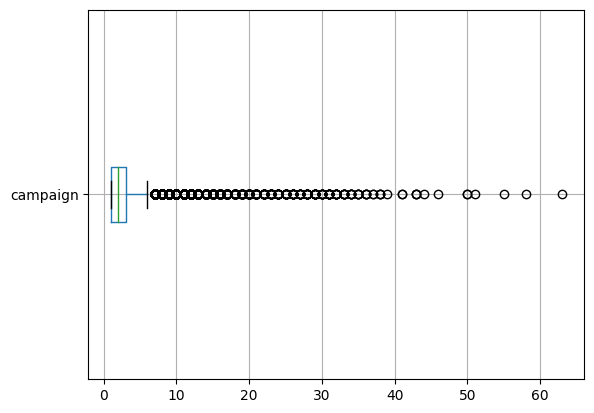

We can see some outliers (the dots on the right) 

Now let's see how many rows will be left if we filter the rows which include values further than 2 std deviations from the mean.
The number of rows: 43422
And how many rows there are in the original DF? 45211
Meaning we found 1789 outliers!


In [ ]:
import matplotlib.pyplot as plt
df = pd.read_csv("bank-full_2016.csv")

# Does the campaign column in the table have any outliers?
print("Yes. As shown below, The mean value is 2.7638 And the max value is 63.")
print("There is a big differance between the two, so it's probably an outlier. \n")
display(df.campaign.describe())

print("Let's see: \n")
df.boxplot(vert = False, column=["campaign"])
plt.show()
print("We can see some outliers (the dots on the right) \n")
print("Now let's see how many rows will be left if we filter the rows which include values further than 2 std deviations from the mean.")
print("The number of rows:", len(df[np.abs(df.campaign - df.campaign.mean()) <= (2 * df.campaign.std())].index))
print("And how many rows there are in the original DF?", len(df.index))
print("Meaning we found 1789 outliers!")



## Normalization - Bonus

Think of an appropriate normalization method and normalize the days_from_last_contact column in the table. Why did you choose this method?

Let's look at this column histogram:


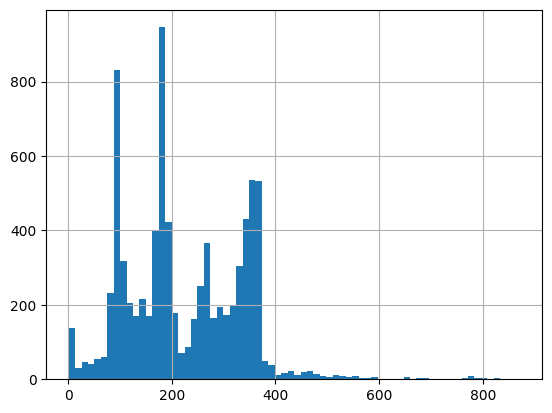

We can see that the data is skewed (right leaning curve).
So as we learned, we will want to use the log normalization.
Also, we can see that the entropy of the data is low, and that the distribution is approximatly a mixture of three normal ditributions.
So we will use the log normalization and then the Z normalization.


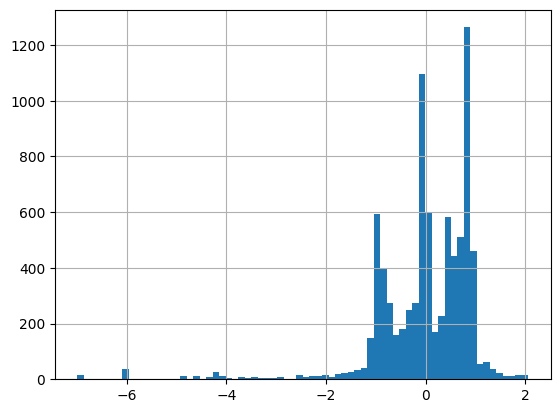

In [ ]:
print("Let's look at this column histogram:")
df["days_from_last_contact"].hist(bins=70)
plt.show()
print("We can see that the data is skewed (right leaning curve).")
print("So as we learned, we will want to use the log normalization.")
print("Also, we can see that the entropy of the data is low, and that the distribution is approximatly a mixture of three normal ditributions.")
print("So we will use the log normalization and then the Z normalization.")

days_from_last_contact_log = np.log2(df["days_from_last_contact"])
mean = np.mean(days_from_last_contact_log)
std = np.std(days_from_last_contact_log)
days_from_last_contact_log_norm = (days_from_last_contact_log - mean)/std
days_from_last_contact_log_norm.hist(bins=70)
plt.show()